# DATA ANALYSIS

In [197]:
%pip install mplcursors 

Note: you may need to restart the kernel to use updated packages.


In [198]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import pacmap
import numpy as np
import csv
import matplotlib.pyplot as plt
import json
import re
from matplotlib.colors import Normalize
import mplcursors


In [199]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

In [200]:
f = open('../Data/data.json')
data = json.load(f)

a = open('../Data/added_data.json')
added_data = json.load(a)

In [201]:
model= word2vec.Word2Vec.load('../Data/Models/model_5e_100d.model')

In [202]:
# Create a dictionary to map addresses to their corresponding embeddings
journey_embeddings = {}
for journey in sequences:
    for place in journey:
        try:
            journey_id = place  # Convert the journey list to a tuple to use as a dictionary key
            journey_embeddings[journey_id] = model.wv[journey_id]
        except KeyError:
            # Handle cases where the journey is not present in the Word2Vec model
            pass

# Convert dictionary to numpy array
X = np.array(list(journey_embeddings.values()))

# Create a list of all addresses
journey_ids = list(journey_embeddings.keys())

# Create a dictionary mapping addresses to their index in the numpy array
journey_idx = {journey_id: idx for idx, journey_id in enumerate(journey_ids)}

In [203]:
X = model.wv.vectors

#pacmap
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_pacmap = embedding.fit_transform(X, init="pca")

# tsne
def tsne_plot(X):
    X=np.array(X)
    proj = TSNE(perplexity=20).fit_transform(X)
    return proj
proj_tsne=tsne_plot(X)

# UMAP 
proj_umap = umap.UMAP(n_components=2, n_neighbors=20, metric='cosine').fit_transform(X)

# pca 
pca = PCA(n_components=2)
proj_pca=pca.fit_transform(X)


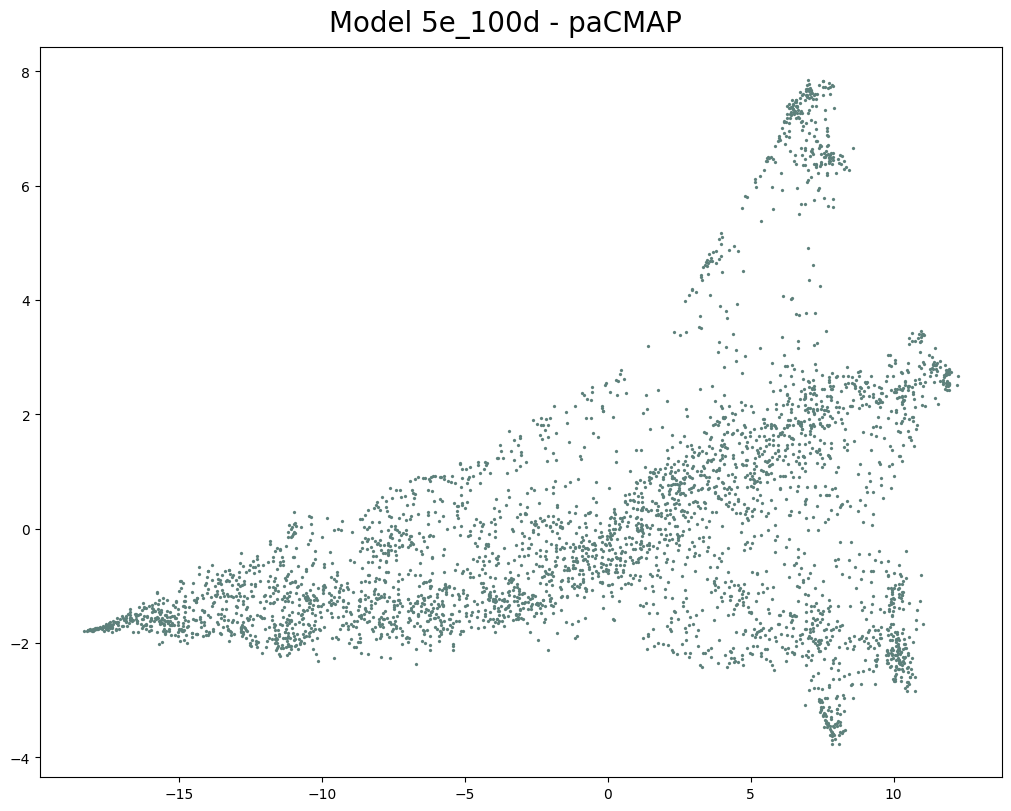

In [204]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8), layout="constrained")

#Plot all city
plt.scatter(
    [proj_pacmap[journey_idx[journey_id]][0] for journey_id in journey_ids],
    [proj_pacmap[journey_idx[journey_id]][1] for journey_id in journey_ids],
    lw=0.1, s=5, marker='o', c="#5D807B"
)

fig.suptitle('Model 5e_100d - paCMAP', fontsize=20)

plt.show()

_____________________________________________________________________

# COUNT

In [205]:
counts_to_labels = {100: '0-100', 1000: '101-1000', 5000: '1001-5000', 10000: '5001-10000', 50000: '10000-50000', 100000: '50001-100000', 100001: '100000+'}

In [206]:
address_count_seq = {}
for seq in sequences:
    for place in seq:
        if place in address_count_seq:
            address_count_seq[place] += 1
        else:
            address_count_seq[place] = 1


from collections import Counter

# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
address_counts = Counter(address_count_seq.values())

# Sort the counts by their keys (number of mentions), in descending order
sorted_counts = sorted(address_counts.items(), key=lambda x: x[0], reverse=True)

In [207]:

address_cluster_count = {}

for address in address_count_seq.keys():
      count = address_count_seq[address]
      if 0 <= count <= 100:
         address_cluster_count[address] = 100
      elif 101 <= count <= 1000:
         address_cluster_count[address] = 1000
      elif 1001 <= count <= 5000:
         address_cluster_count[address] = 5000
      elif 5001 <= count <= 10000:
         address_cluster_count[address] = 10000
      elif 10001 <= count <= 50000:
         address_cluster_count[address] = 50000
      elif 50001 <= count <= 100000:
         address_cluster_count[address] = 100000
      elif 100001 <= count:
         address_cluster_count[address] = 100001
      else:
         print("address was: ", address)
         address_cluster_count[address] = 0 


In [208]:
from collections import Counter

# Count occurrences of each zip code
count_counts = Counter(address_cluster_count.values())

# Print the zip code counts
for occurrence, count in sorted(count_counts.items()):
    print(f"Count {occurrence}: {count} occurrences")

Count 100: 4063 occurrences
Count 1000: 833 occurrences
Count 5000: 265 occurrences
Count 10000: 57 occurrences
Count 50000: 76 occurrences
Count 100000: 22 occurrences
Count 100001: 9 occurrences


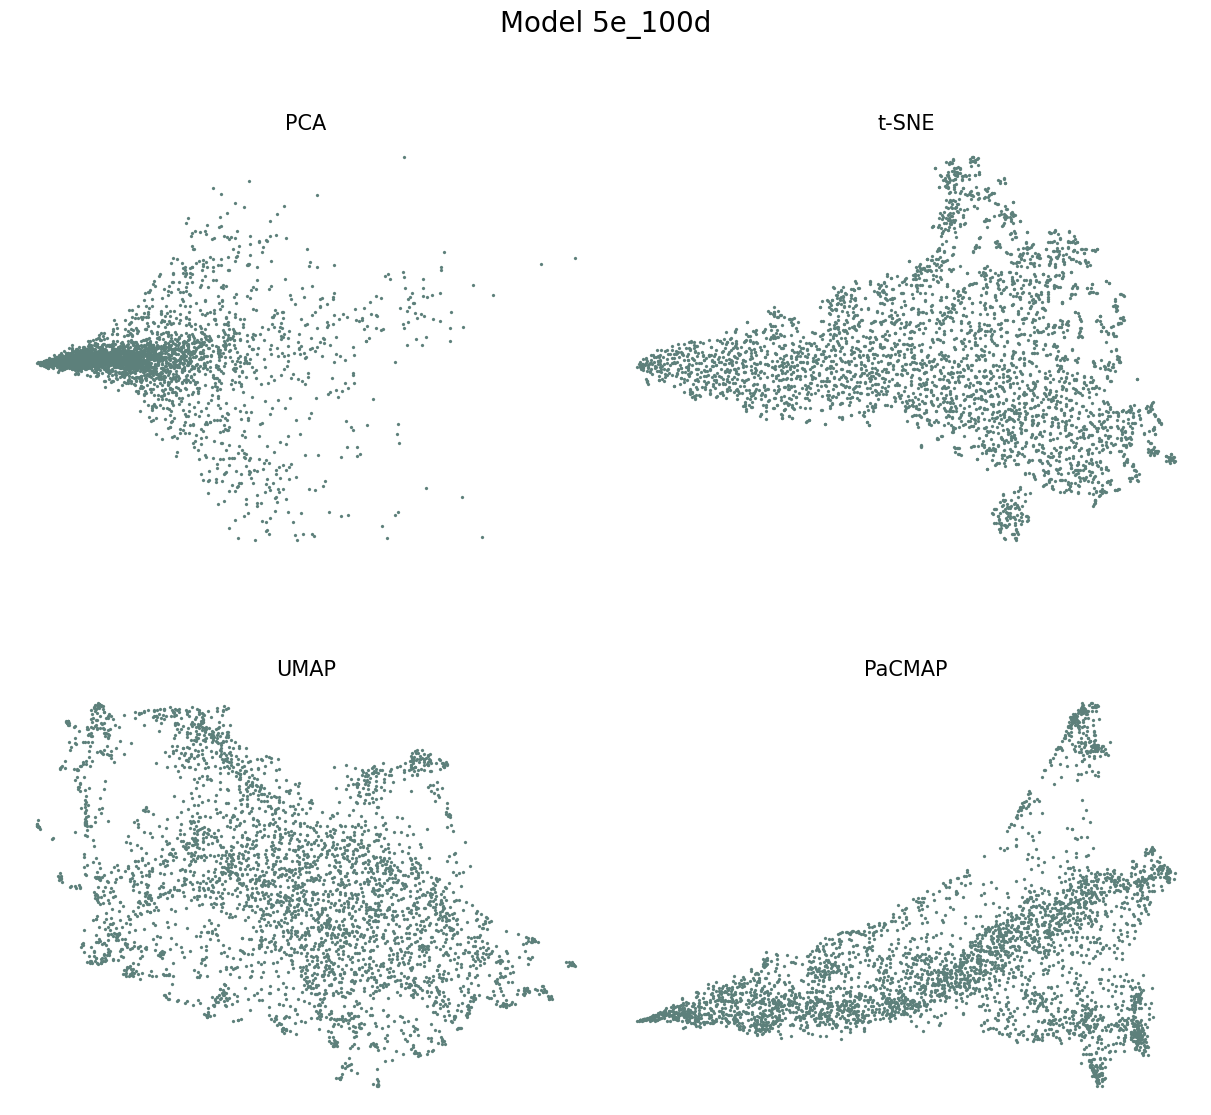

In [209]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)
        col.scatter(
            [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
            [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
            lw=0.1, s=5, c='#5D807B'
        )
        s += 1
        col.axis('off')

# Custom legend
fig.suptitle('Model 5e_100d', fontsize=20, y=1.1)
plt.show()


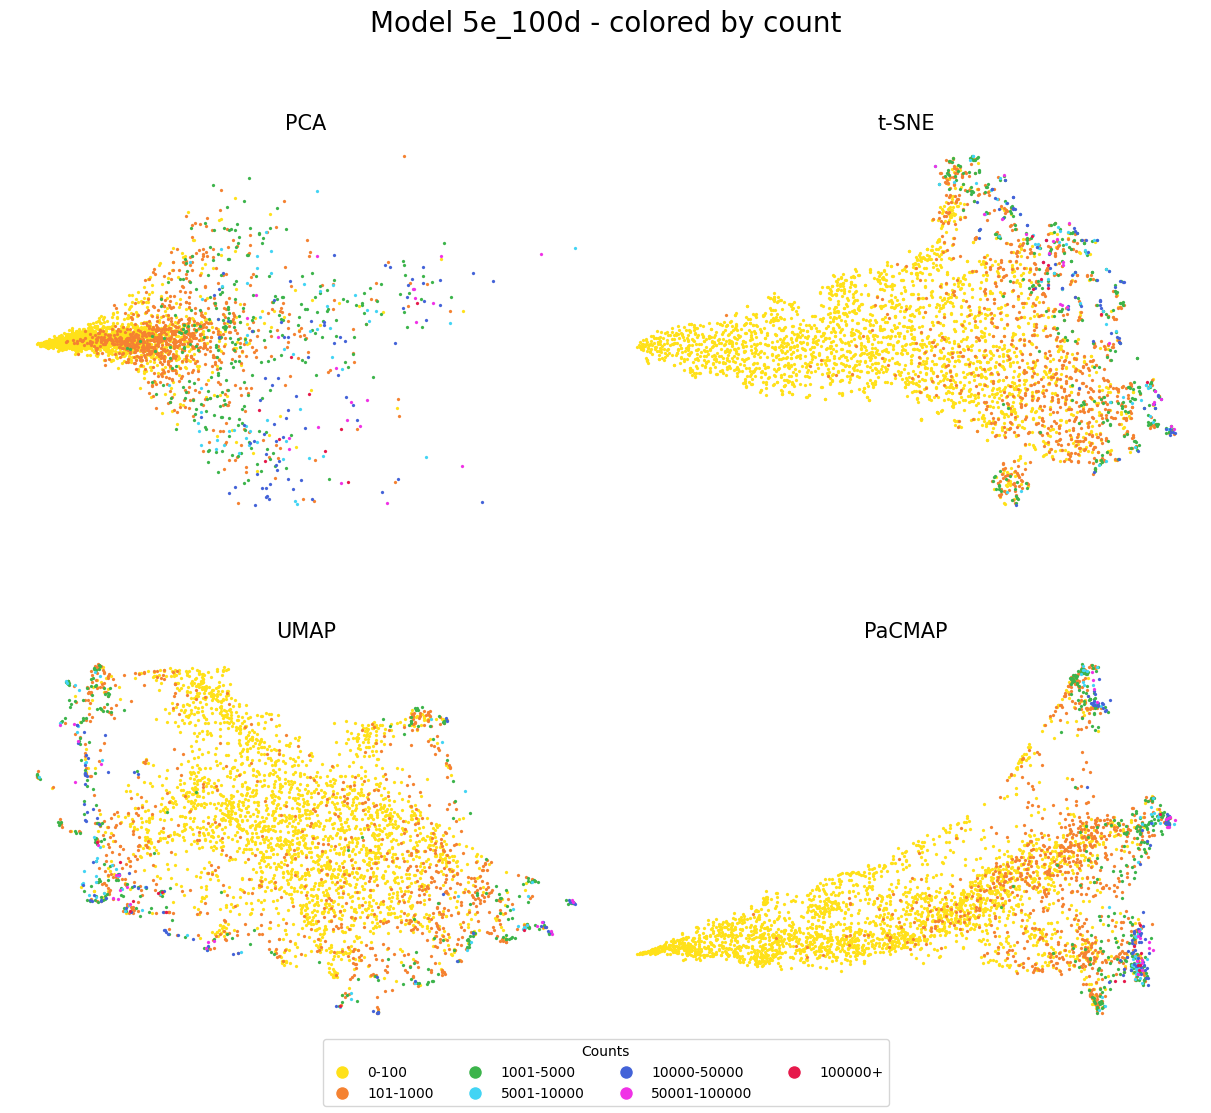

In [210]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )
        #  # Add labels to stations makes it impossible to read 
        #     for journey_id in relevant_journeys_zip:
        #         x_coord = xs[s][journey_idx[journey_id]][0]
        #         y_coord = xs[s][journey_idx[journey_id]][1]
        #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
            
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


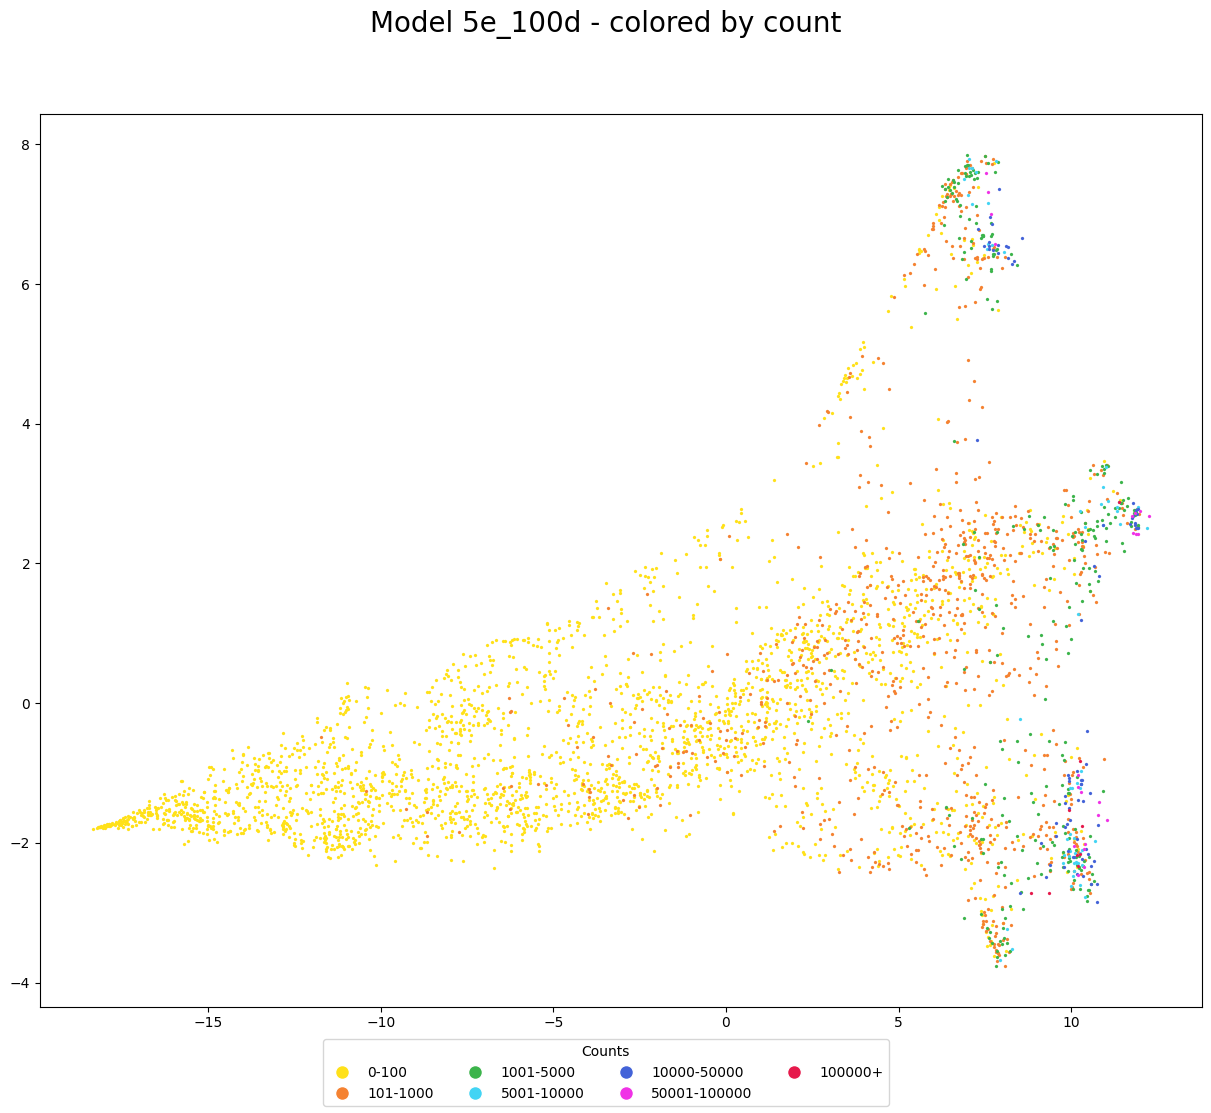

In [211]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )
# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


### Metro

In [212]:
stations_with_metro = []
for location in journey_ids:
    if '(Metro)' in location:
        stations_with_metro.append(location)

City = ["Nørrebro St. (Metro)", "Nørrebros Runddel St. (Metro)", "Nuuks Plads St. (Metro)", "Axelm Møllers Have St. (Metro)", 
      "Frederiksberg St. (Metro)", "Frederiksberg Allé St. (Metro)", "Enghave Plads St. (Metro)", "København H St. (Metro)", "København H (Metro)",
      "Rådhuspladsen St. (Metro)", "Gammel Strand St. (Metro)", "Kongens Nytorv St. (Metro)", "Marmorkirken St. (Metro)",
       "Østerport St. (Metro)", "Trianglen St. (Metro)", "Poul Henningsens Plads St. (Metro)", "Vibenhus Runddel St. (Metro)",
        "Skjolds Plads St. (Metro)", "Nordhavn St. (Metro)", "Orientkaj St. (Metro)"]

M1_2 = ["Vanløse St. (Metro)", "Flintholm St. (Metro)", "Lindevang St. (Metro)", "Fasanvej St. (Metro)", 
      "Frederiksberg St. (Metro)", "Forum St. (Metro)", "Nørreport St. (Metro)", "Kongens Nytorv St. (Metro)",
      "Christianshavn St. (Metro)"]
M1 = ["Islands Brygge St. (Metro)", "DR Byen St. (Metro)", "Sundby St. (Metro)", "Bella Center St. (Metro)", "Ørestad St. (Metro)", "Vestamager St. (Metro)"]
M2 = ["Amagerbro St. (Metro)", "Lergravsparken St. (Metro)", "Øresund St. (Metro)",
      "Amager Strand St. (Metro)", "Femøren St. (Metro)", "Kastrup St. (Metro)", "Københavns Lufthavn St. (Metro)"]

#color_to_metro= {"City": "Red", "M2": "Yellow", "M1": "Green", "M1_2": "Purple", "Metro": "Black"}
color_to_metro= {"Red": "City" , "Yellow":  "M2", "Green": "M1", "Purple": "M1_2"}

# Create the plots

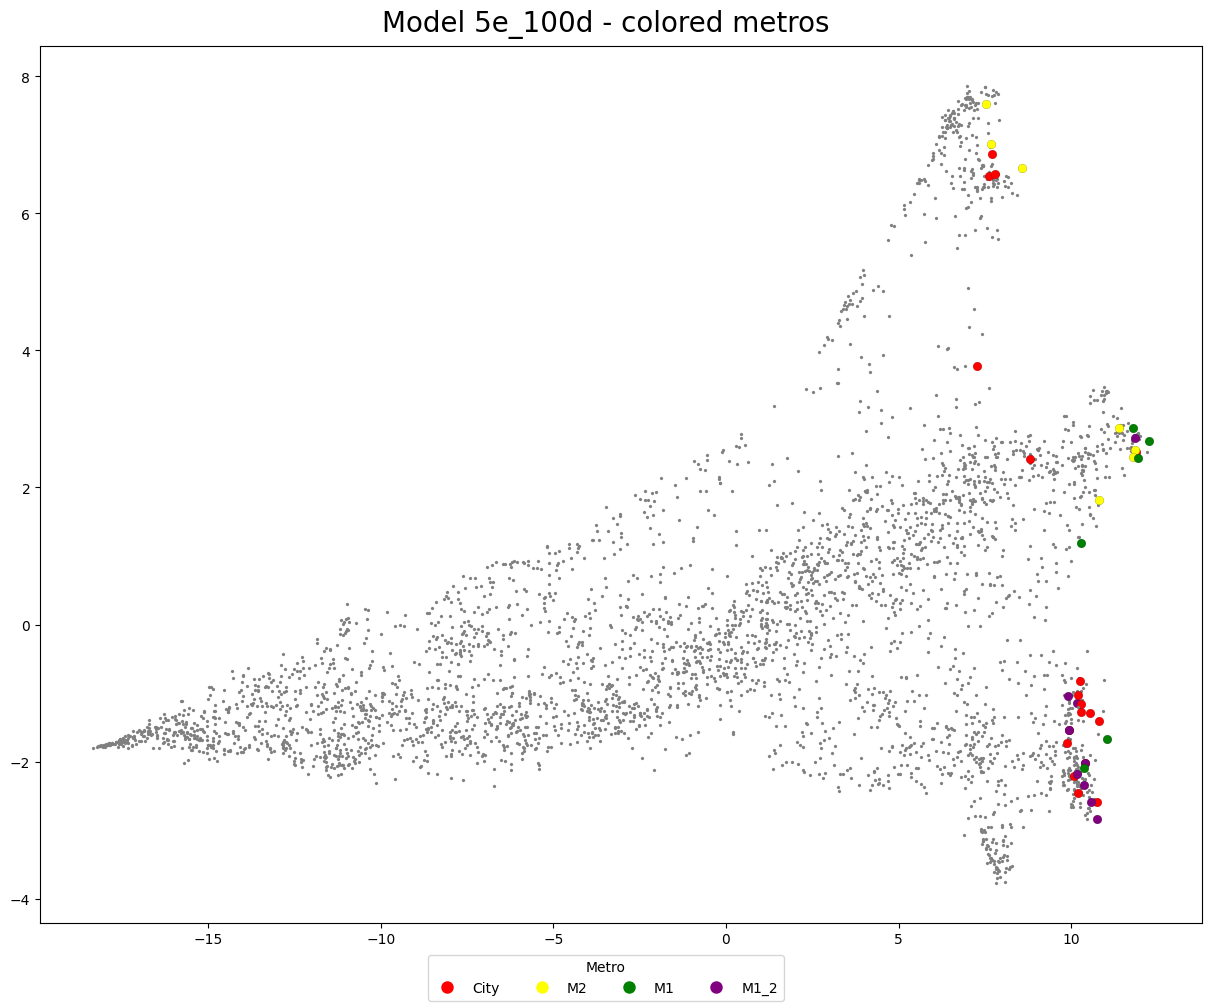

In [213]:
# Define color palette for zip codes
unique_metroes = color_to_metro.keys()
color_palette = ["Red", "Yellow", "Green", "Purple"]
colors = {}
for idx, metro in enumerate(unique_metroes):
    colors[metro] = color_palette[idx]


fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained")


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    #plot all without metro
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        lw=0.1, s=5, label=current_count_code, facecolor='grey'
    )

    # plt.scatter(
    #     [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     lw=0.1, s=40, label=current_count_code, edgecolors='black', facecolor='none'
    # )

    #Plot all city
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in City],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in City],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Red', label="City"
    )

    #Plot all m1_2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Purple', label="M1_2"
    )

    #Plot all m2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Yellow', label="M2"
    )

      #Plot all m1
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Green', label="M1"
    )


# for journey_id in stations_with_metro:
#     x_coord = proj_pacmap[journey_idx[journey_id]][0]
#     y_coord = proj_pacmap[journey_idx[journey_id]][1]
#     plt.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colors[metro], label=color_to_metro[metro]) for metro in unique_metroes]
fig.legend(handles= handles, loc="outside lower center", ncol=5, title='Metro')
fig.suptitle('Model 5e_100d - colored metros', fontsize=20)

plt.show()

_____________________________________________________________________

# ZIPCODES

In [214]:
def getZip(info):
    pattern_zip = '\d{4}'
    pattern_denmark = 'anmark'
    match_zip = re.search(pattern_zip, info)
    match_denmark = re.search(pattern_denmark, info)
    if match_zip is not None and match_denmark is not None:
        return match_zip.group()
    else :
        return
    

In [215]:
pattern = r'\d.*'

def get_modified (location):
    location = (re.sub(pattern, '', location)).strip()
    if location == '':
        return
    if location[-1] == '(':
        location = location[:-1]
    if location == 'Zoo':
        location = "Zoologisk Have"
    return location


In [216]:
address_cluster_zips = {}
zip_to_label = {'1000': 'Kbh K', '1700': 'Vesterbro', '2000': 'Frederiksberg', '2100': 'Østerbro', '2200': 'Nørrebro', 
                '2300': 'Kbh S', '2400': 'Kbh NV', '2500': 'Valby', '2600': 'Glostrup', '2700': 'Brønshøj', '2800': 'Lyngby', '2900': 'Hellerup', '2770': 'Kastrup'}
zip_to_label_clustered = {'2800': 'Nord', '1000': 'Midt', '2600': 'Vest', '2300' : 'Syd'}
wrong_addresses = []

In [217]:

for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address can be empty
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'
            else: 
                wrong_addresses.append(address) #go through later


#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip_code = getZip(added_data[address]['address'])
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'

In [218]:
from collections import Counter

# Count occurrences of each zip code
zip_code_counts = Counter(address_cluster_zips.values())

# Print the zip code counts
for zip_code, count in zip_code_counts.items():
    print(f"Zip code {zip_code}: {count} addresses")

Zip code 2100: 3345 addresses
Zip code 2400: 3539 addresses
Zip code 1000: 3995 addresses
Zip code 2300: 6497 addresses
Zip code 2500: 2205 addresses
Zip code 1700: 2522 addresses
Zip code 2770: 2999 addresses
Zip code 2800: 413 addresses
Zip code 2000: 1921 addresses
Zip code 2200: 2916 addresses
Zip code 2700: 2554 addresses
Zip code 2600: 797 addresses


In [219]:
# New dictionary to store modified keys and their corresponding zip codes
modified_new_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_cluster_zips.items():
    new_address = get_modified(address)
    modified_new_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_3004/3659850241.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplcursors/_pick_info.py:55: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



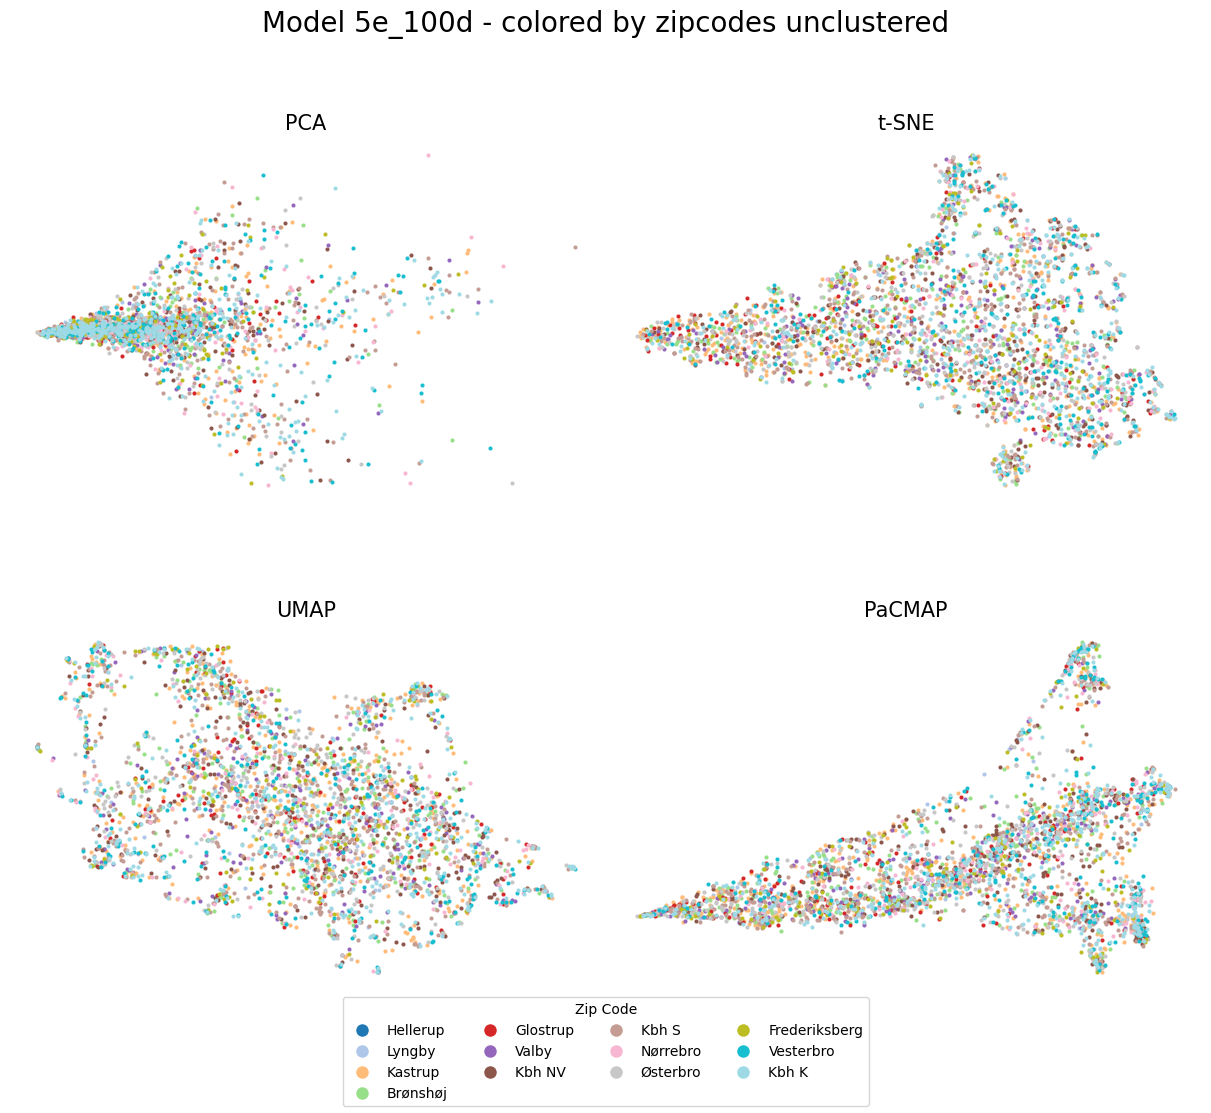

In [220]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label.keys(), reverse=True)
num_colors = len(unique_zip_codes) 
color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

# Create the plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

#should be two times two
for row in ax:
    for col in row:
        #print("One plot")
        col.set_title(ts[s], fontsize=15)
        # # Filter journeys by field

        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_new_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=8, label=current_zip_code, c=zip_colors[current_zip_code]
            )
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes unclustered', fontsize=20, y=1.1)
plt.show()


### More clustered

In [221]:
#Nord, Midt, Vest, Syd
for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address can be empty
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                        if 1000 <= zip <= 1499:
                            #Kbh K
                            address_cluster_zips[address] = '1000'
                        elif 1500 <= zip <= 1799:
                            #Kbh V
                            address_cluster_zips[address] = '1000'
                        elif zip == 2000:
                            #Frederiksberg C
                            address_cluster_zips[address] = '1000'
                        elif 2000 < zip < 2200: #2150 er Nordhavn
                            #Østerbro
                            address_cluster_zips[address] = '1000'
                        elif 2200 <= zip < 2300:
                            #København N (Nørrebro)
                            address_cluster_zips[address] = '1000'
                        elif 2300 <= zip < 2400:
                            #Amager Kbh S
                            address_cluster_zips[address] = '2300'
                        elif 2400 <= zip < 2500:
                            #Kbh NV
                            address_cluster_zips[address] = '1000'
                        elif 2500 <= zip < 2600:
                            #Valby
                            address_cluster_zips[address] = '2300'
                        elif 2600 <= zip < 2700:
                            #Glostrup
                            address_cluster_zips[address] = '2600'
                        elif zip == 2770 or zip == 2791:
                            #Kastrup Dragør
                            address_cluster_zips[address] = '2300'
                        elif 2700 <= zip < 2800:
                            #Brønshøj
                            address_cluster_zips[address] = '1000'
                        elif 2800 <= zip < 2900:
                            #Lyngby
                            address_cluster_zips[address] = '2800'
                        elif 2800 <= zip < 2900:
                            #Hellerup
                            address_cluster_zips[address] = '2800'
            else: 
                wrong_addresses.append(address) #go through later


#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip_code = getZip(added_data[address]['address'])
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 1499:
                #Kbh K
                address_cluster_zips[address] = '1000'
            elif 1500 <= zip <= 1799:
                #Kbh V
                address_cluster_zips[address] = '1000'
            elif zip == 2000:
                #Frederiksberg C
                address_cluster_zips[address] = '1000'
            elif 2000 < zip < 2200: #2150 er Nordhavn
                #Østerbro
                address_cluster_zips[address] = '1000'
            elif 2200 <= zip < 2300:
                #København N (Nørrebro)
                address_cluster_zips[address] = '1000'
            elif 2300 <= zip < 2400:
                #Amager Kbh S
                address_cluster_zips[address] = '2300'
            elif 2400 <= zip < 2500:
                #Kbh NV
                address_cluster_zips[address] = '1000'
            elif 2500 <= zip < 2600:
                #Valby
                address_cluster_zips[address] = '2300'
            elif 2600 <= zip < 2700:
                #Glostrup
                address_cluster_zips[address] = '2600'
            elif zip == 2770 or zip == 2791:
                #Kastrup Dragør
                address_cluster_zips[address] = '2300'
            elif 2700 <= zip < 2800:
                #Brønshøj
                address_cluster_zips[address] = '1000'
            elif 2800 <= zip < 2900:
                #Lyngby
                address_cluster_zips[address] = '2800'
            elif 2800 <= zip < 2900:
                #Hellerup
                address_cluster_zips[address] = '2800'

In [222]:
# New dictionary to store modified keys and their corresponding zip codes
modified_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_cluster_zips.items():
    new_address = get_modified(address)
    modified_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_3004/2470452665.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



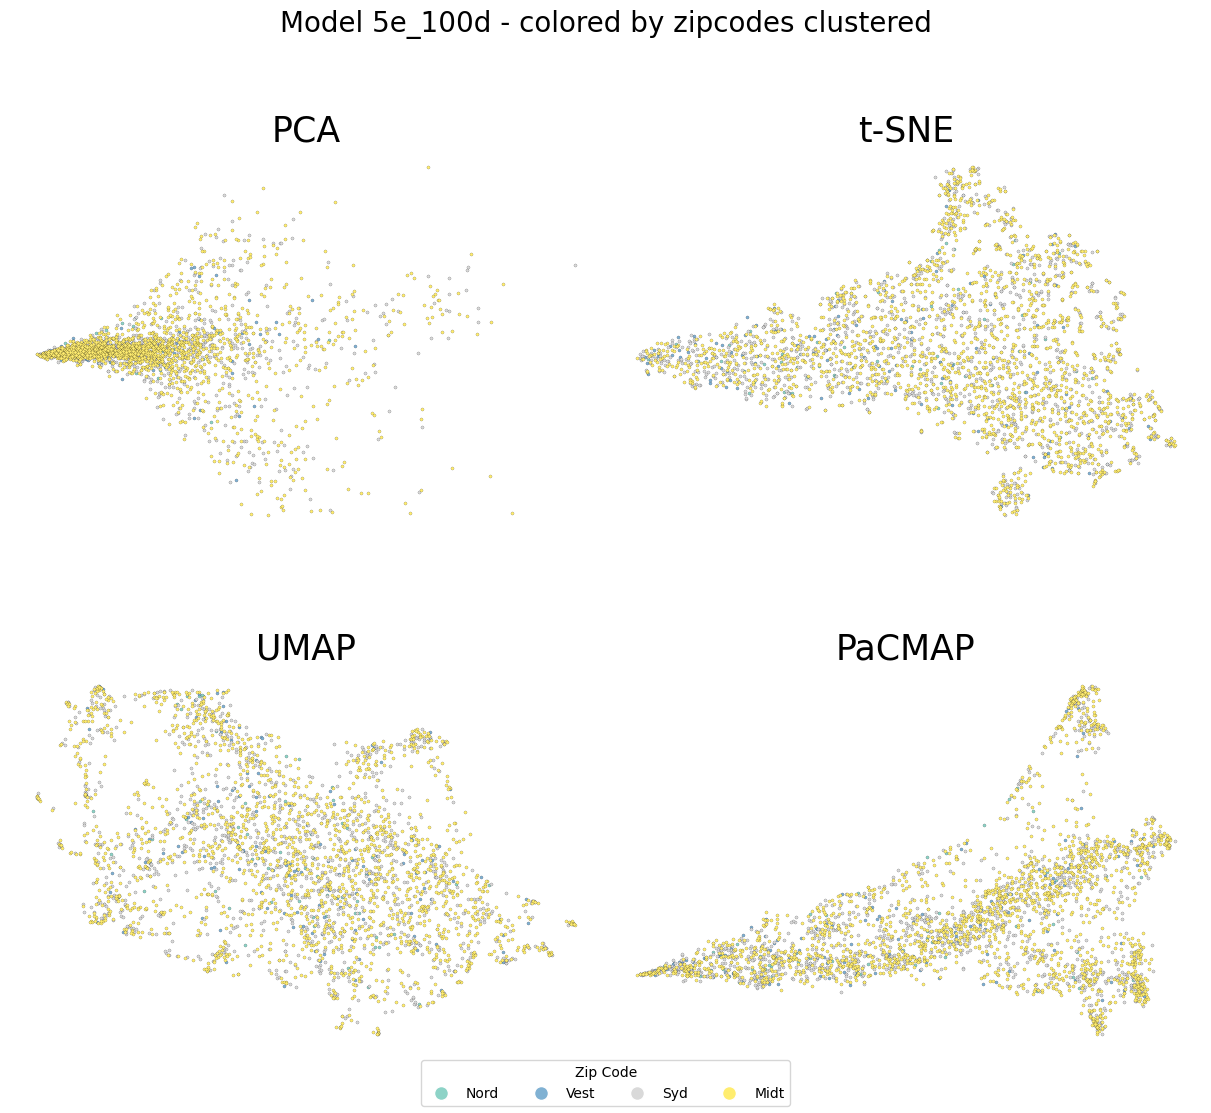

In [223]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label_clustered.keys(), reverse=True)
num_colors = len(unique_zip_codes) #change this
color_palette = plt.cm.get_cmap('Set3', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=25)
        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)
            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_zip_code, edgecolors='black',  c=zip_colors[current_zip_code]
            )

        s += 1
        col.axis('off')

# Custom legend

handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label_clustered[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes clustered', fontsize=20, y=1.1)
plt.show()


_____________________________________________________________________

# SIMILARITY - EMBEDDING VALIDATION

In [224]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming X is your embeddings_matrix
embeddings_matrix = X.shape

# Calculate cosine similarity matrix between station vectors
similarity_matrix = cosine_similarity(X)

highest = -1
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if i != j and similarity_matrix[i, j] > highest:
            highest = similarity_matrix[i, j]

print(highest)

# Find the indices of the maximum similarity score in the updated matrix
max_indices = np.argwhere(similarity_matrix == highest)

# Extract the indices of the most similar pair
most_similar_pair_indices = max_indices[0]

# Get the station names corresponding to the indices
station_names = model.wv.index_to_key
station_i_name = station_names[most_similar_pair_indices[0]]
station_j_name = station_names[most_similar_pair_indices[1]]

# Print the names of the two most similar stations
print(f"The two most similar stations (not the same) are: {station_i_name} and {station_j_name}")

# # X is your numpy array containing the embedding vectors. Each row of X represents a vector in the embedding space.
# # cosine_similarity(X) computes the cosine similarity between all pairs of vectors in X.
# # The resulting similarity_matrix is a symmetric matrix where each element similarity_matrix[i, j] represents the cosine similarity between vectors X[i] and X[j].
# # After calculating the cosine similarity matrix, you can proceed to perform clustering or any other analysis based on the similarity values.

0.9905597
The two most similar stations (not the same) are: Køge St. and Thorupgård Allé


### København H validation on cosine embedding

In [225]:
list_lbh_sim = model.wv.similar_by_key('København H', topn=4000)

kbh_to_sim = {"København H": 1.0}
for location, sim in list_lbh_sim:
    kbh_to_sim[location] = sim

kbh_to_sim

{'København H': 1.0,
 'Axeltorv': 0.7438591718673706,
 'Banegårdspladsen': 0.7147773504257202,
 'Tietgensgade': 0.7139832377433777,
 'Vestergade': 0.6945743560791016,
 'Bernstorffsgade': 0.6939112544059753,
 'Vester Voldgade': 0.6863526701927185,
 'DGI Byen': 0.683293879032135,
 'Hammerichsgade': 0.6667801737785339,
 'Istedgade': 0.658430814743042,
 'Halmtorvet': 0.6516885757446289,
 'Reventlowsgade': 0.6504085659980774,
 'Trommesalen': 0.6448825001716614,
 'Vodroffs Tværgade': 0.6420493125915527,
 'Østergade': 0.6205928921699524,
 'Nygade': 0.6191301345825195,
 'København H (Metro)': 0.6124704480171204,
 'Gammeltorv': 0.6101997494697571,
 'Rådhusstræde': 0.6089519262313843,
 'Frederiksberggade': 0.6081905364990234,
 'Knabrostræde': 0.6081708669662476,
 'Krystalgade': 0.6062605381011963,
 'Niels Ebbesens Vej': 0.6061654686927795,
 'Ingerslevsgade': 0.6023964285850525,
 'Studiestræde': 0.6016766428947449,
 'Nørre Søgade': 0.5978189706802368,
 'Maltagade': 0.5945670008659363,
 'Sankt Jør

low Den Ukrainske Ambassade    0.01666565053164959
high København H    1.0


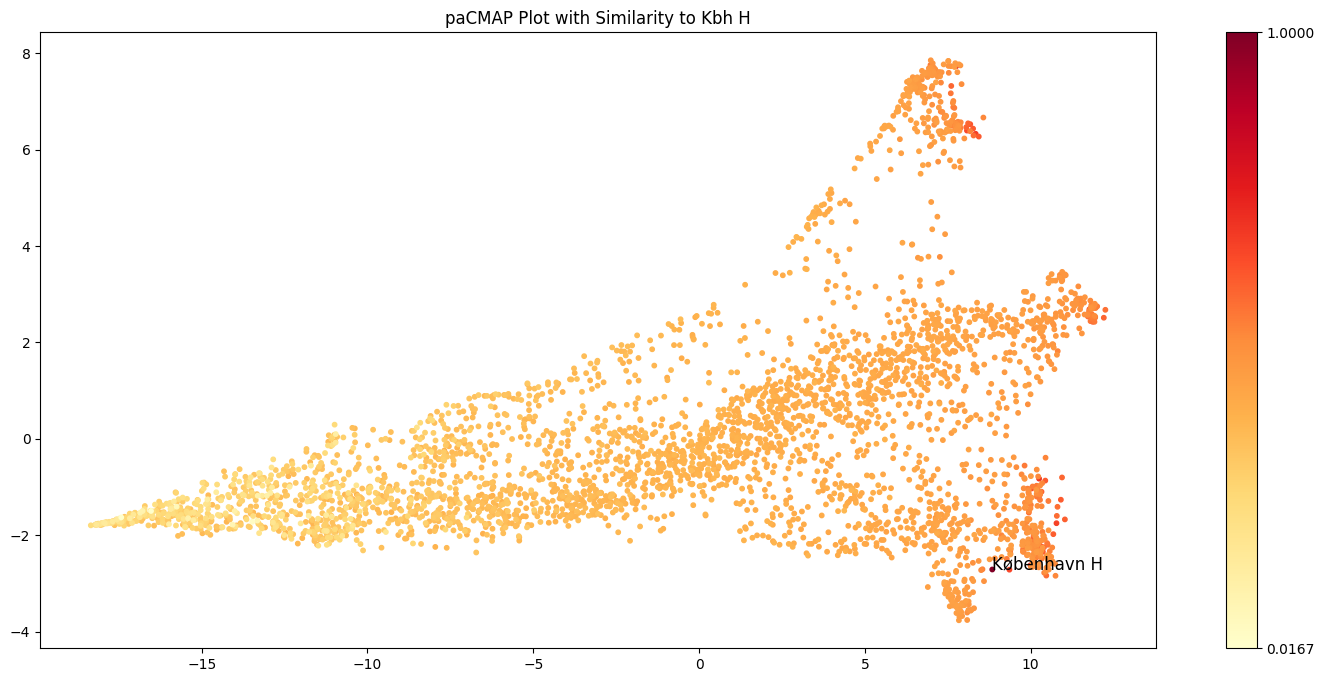

In [226]:

station_names = kbh_to_sim.keys()
# Get the first element
low_key, low_value = list(kbh_to_sim.items())[-1]
high_key, high_value = next(iter(kbh_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(kbh_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

kbh_idx = journey_idx['København H']
#ADD LABEL TO JUST KØBENHAVN H
plt.text(proj_pacmap[kbh_idx, 0], proj_pacmap[kbh_idx, 1], 'København H', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Kbh H')
plt.show()


### Rued Langgaards Vej validation on cosine embedding

In [227]:
list_rued_sim = model.wv.similar_by_key('Rued Langgaards Vej', topn=4000)

rued_to_sim = {"Rued Langgaards Vej": 1.0}
for location, sim in list_rued_sim:
    rued_to_sim[location] = sim

rued_to_sim

{'Rued Langgaards Vej': 1.0,
 'Krokodillegade': 0.941950261592865,
 'Gunløgsgade': 0.929219663143158,
 'Smørumvej': 0.9236794114112854,
 'Dæmningen': 0.9234192967414856,
 'Vennemindevej': 0.9221628308296204,
 'Fælledparken Skatepark': 0.9207092523574829,
 'Mosesvinget': 0.9200780391693115,
 'Det Nye Emdrupborg Kollegium': 0.9198076128959656,
 'Dyssegårdsvej': 0.918389618396759,
 'Adolph Steens Alle': 0.9172426462173462,
 'Bispebjerg Parkallé': 0.9136267304420471,
 'Mosevangen': 0.9121113419532776,
 'Druehaven': 0.911362886428833,
 'Gustav Johannsens Vej': 0.9113001823425293,
 'Skyttegårdvej': 0.9112046957015991,
 'Charlotte Muncks Vej': 0.9107897877693176,
 'Kagsbro': 0.9102784395217896,
 'Plantevej': 0.9101508259773254,
 'Junggreensvej': 0.9092990756034851,
 'Rigensgade': 0.9092826247215271,
 'Ole Maaløes Vej': 0.9078429937362671,
 'Kærskiftevej': 0.9077015519142151,
 'Heinesgade': 0.9075583815574646,
 'Adriansvej': 0.9074336290359497,
 'Sankt Markus Plads': 0.9061188101768494,
 'Valb

low Rued Langgaards Vej    1.0
high Den Ukrainske Ambassade    0.06156621500849724


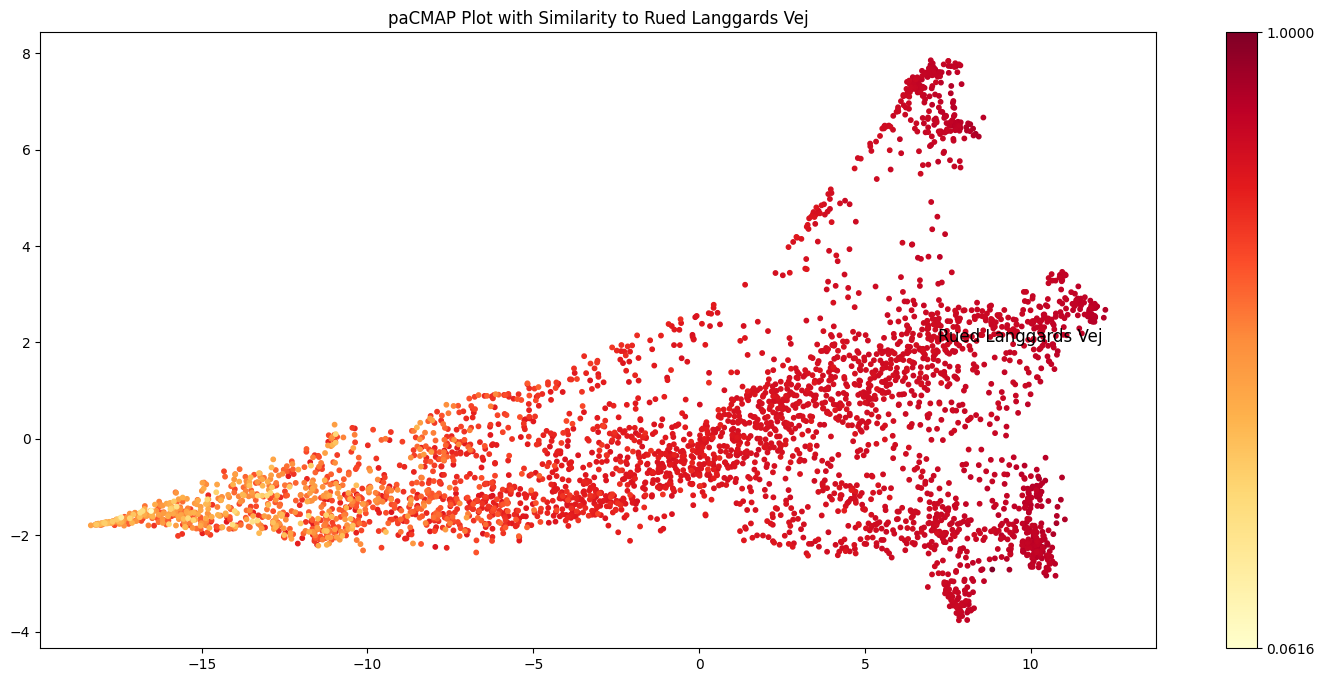

In [228]:

station_names = rued_to_sim.keys()
# Get the first element
low_key, low_value = next(iter(rued_to_sim.items()))
high_key, high_value = list(rued_to_sim.items())[-1]

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(rued_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale


rued_idx = journey_idx['Rued Langgaards Vej']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[rued_idx, 0], proj_pacmap[rued_idx, 1], 'Rued Langgards Vej', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Rued Langgards Vej')
plt.show()


### Æblehaven validation on cosine embedding

In [229]:
list_æble_sim = model.wv.similar_by_key('Æblehaven', topn=4000)

æble_to_sim = {"Æblehaven": 1.0}
for location, sim in list_æble_sim:
    æble_to_sim[location] = sim

æble_to_sim

{'Æblehaven': 1.0,
 'Martin Luther Kings Vej': 0.9464658498764038,
 'V.A. Borgens Vej': 0.9420552253723145,
 'Marguerite Vibys Plads': 0.9386144876480103,
 'Skoubogade': 0.9379590153694153,
 'Støbegodsvej': 0.9366241693496704,
 'Nobis Hotel': 0.9366217851638794,
 'Lauravej': 0.9359109997749329,
 'Lykkesholms Allé': 0.9359049797058105,
 'Prins Constantins Vej': 0.9356565475463867,
 'Vor Frelsers Kirke': 0.9331955313682556,
 'Ved Kanalen': 0.9329544305801392,
 'Langøgade': 0.9327868223190308,
 'Vestbanevej': 0.9324917197227478,
 'Kulturhuset Indre By': 0.932479739189148,
 'Bratskovvej': 0.9310116767883301,
 'Krügersgade': 0.9308428168296814,
 'Priorvej': 0.9302312731742859,
 'Allersgade': 0.9299588799476624,
 'Kvæsthusbroen': 0.9293764233589172,
 'Hothers Plads': 0.9290462732315063,
 'Grundtvigsvej': 0.9289167523384094,
 'Brysselgade': 0.9286782145500183,
 'Nærumgade': 0.9283057451248169,
 'Gartnerivej': 0.9276339411735535,
 'Tivolislottet': 0.9263295531272888,
 'Lindebugten': 0.92617779

low Den Ukrainske Ambassade    0.10392951965332031
high Æblehaven    1.0


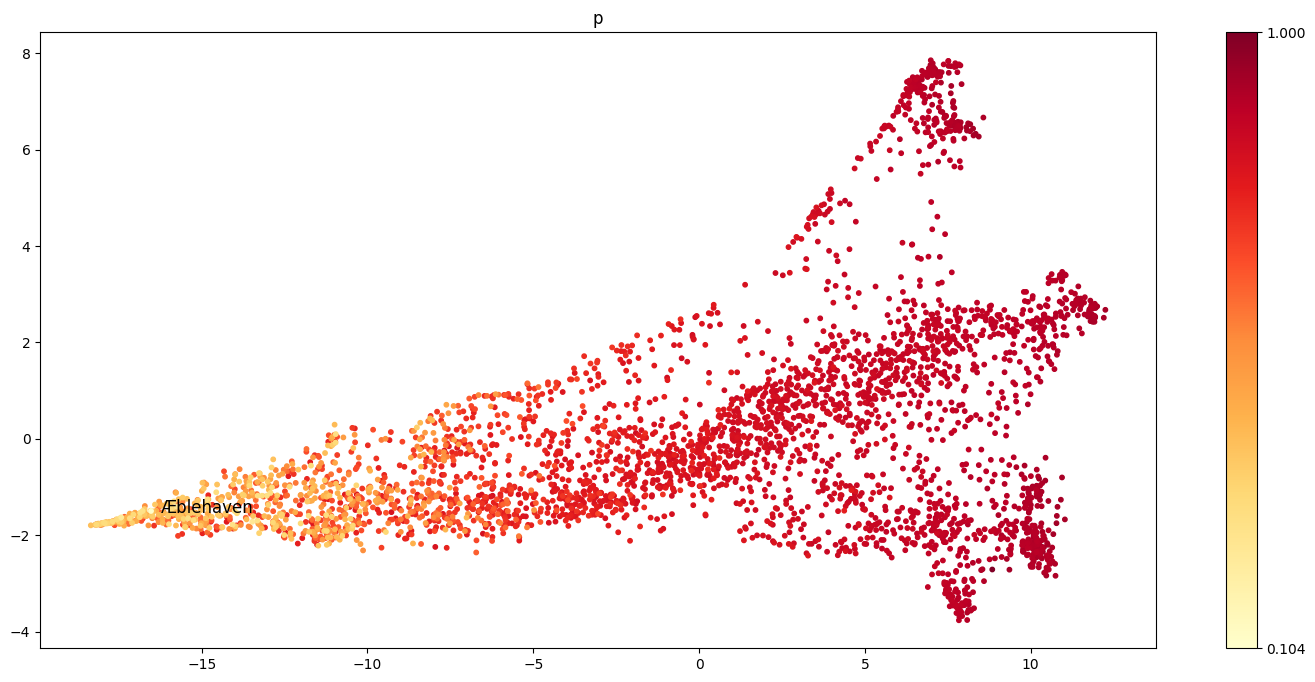

In [230]:

station_names = æble_to_sim.keys()
# Get the first element
low_key, low_value = list(æble_to_sim.items())[-1]
high_key, high_value = next(iter(æble_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(æble_to_sim[station]) for station in station_names]
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

æble_idx = journey_idx['Æblehaven']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[æble_idx, 0], proj_pacmap[æble_idx, 1], 'Æblehaven', fontsize=12, ha='left')

plt.title('p')
plt.show()


__________________________________________________________________________________________________________________________________________________________

# CHOOSING MODEL AND DIMENSIONS


In [231]:
model_10000_100=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d.model')
model_10000_100_lowest=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d_lowest_loss.model')
model_2000_300=word2vec.Word2Vec.load('../Data/Models/best_model_new.model') 
model_2000_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_2000e.model')
model_50_300=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_300d.model')
model_50_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_100d.model')
model_10_100= word2vec.Word2Vec.load('../Data/Models/model_10e_100d.model')
model_5_100= word2vec.Word2Vec.load('../Data/Models/model_5e_100d.model')
model_2_100= word2vec.Word2Vec.load('../Data/Models/model_2e_100d.model')
model_1_100= word2vec.Word2Vec.load('../Data/Models/model_1e_100d.model')

Plotting all models with paCMAP

In [232]:
X = model_10000_100.wv.vectors
embedding_10000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100 = embedding_10000_100.fit_transform(X, init="pca")

X1 = model_10000_100_lowest.wv.vectors
embedding_10000_100_lowest = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100_lowest = embedding_10000_100_lowest.fit_transform(X1, init="pca")

X2 = model_2000_300.wv.vectors
embedding_2000_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_300 = embedding_2000_300.fit_transform(X2, init="pca")

X3 = model_2000_100.wv.vectors
embedding_2000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_100 = embedding_2000_100.fit_transform(X3, init="pca")

X4 = model_50_300.wv.vectors
embedding_50_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_300 = embedding_50_300.fit_transform(X4, init="pca")

X5 = model_50_100.wv.vectors
embedding_50_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_100 = embedding_50_100.fit_transform(X5, init="pca")

X6 = model_10_100.wv.vectors
embedding_10_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10_100 = embedding_10_100.fit_transform(X6, init="pca")

X7 = model_5_100.wv.vectors
embedding_5_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_5_100 = embedding_5_100.fit_transform(X7, init="pca")

X8 = model_2_100.wv.vectors
embedding_2_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2_100 = embedding_2_100.fit_transform(X8, init="pca")

X9 = model_1_100.wv.vectors
embedding_1_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_1_100 = embedding_1_100.fit_transform(X9, init="pca")


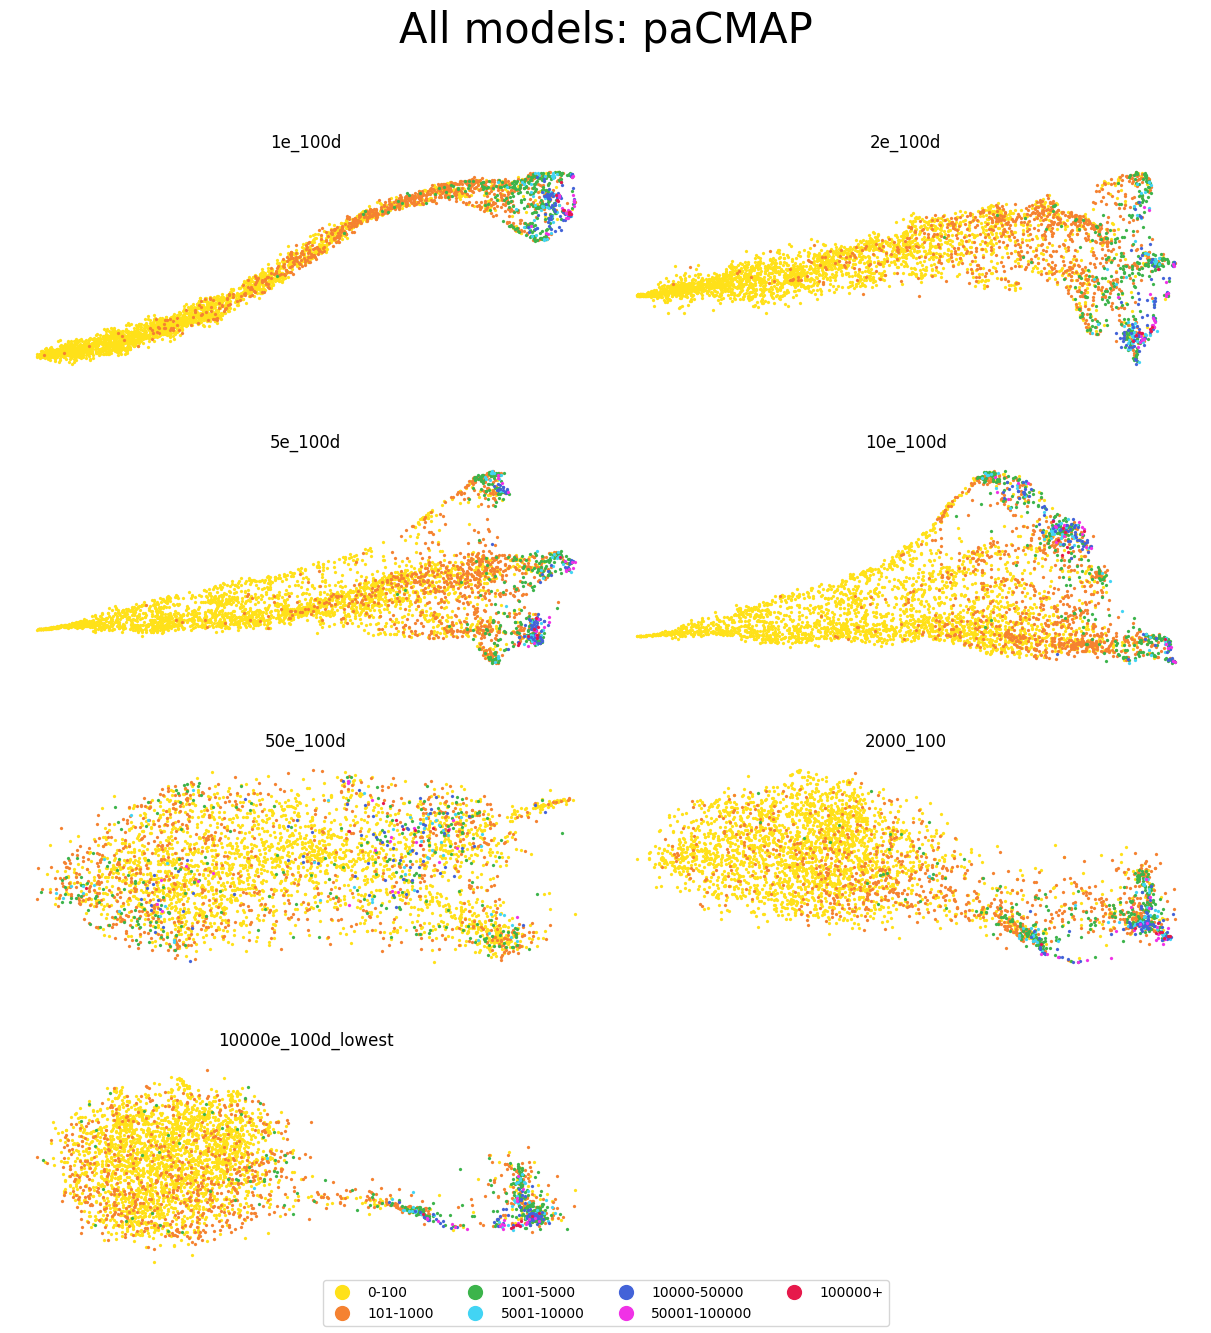

In [233]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_50_100, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            for current_count_code in unique_count_codes:
                relevant_addresses = []
                for address, count_code in address_cluster_count.items():
                    if address in journey_ids:
                        if current_count_code == count_code:
                            relevant_addresses.append(address)

                relevant_journeys_count = [journey_id for journey_id in relevant_addresses]
                col.scatter(
                    [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_count],
                    [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_count],
                    lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
                )
            #  # Add labels to stations makes it impossible to read 
            #     for journey_id in relevant_journeys_zip:
            #         x_coord = xs[s][journey_idx[journey_id]][0]
            #         y_coord = xs[s][journey_idx[journey_id]][1]
            #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
                
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4)
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


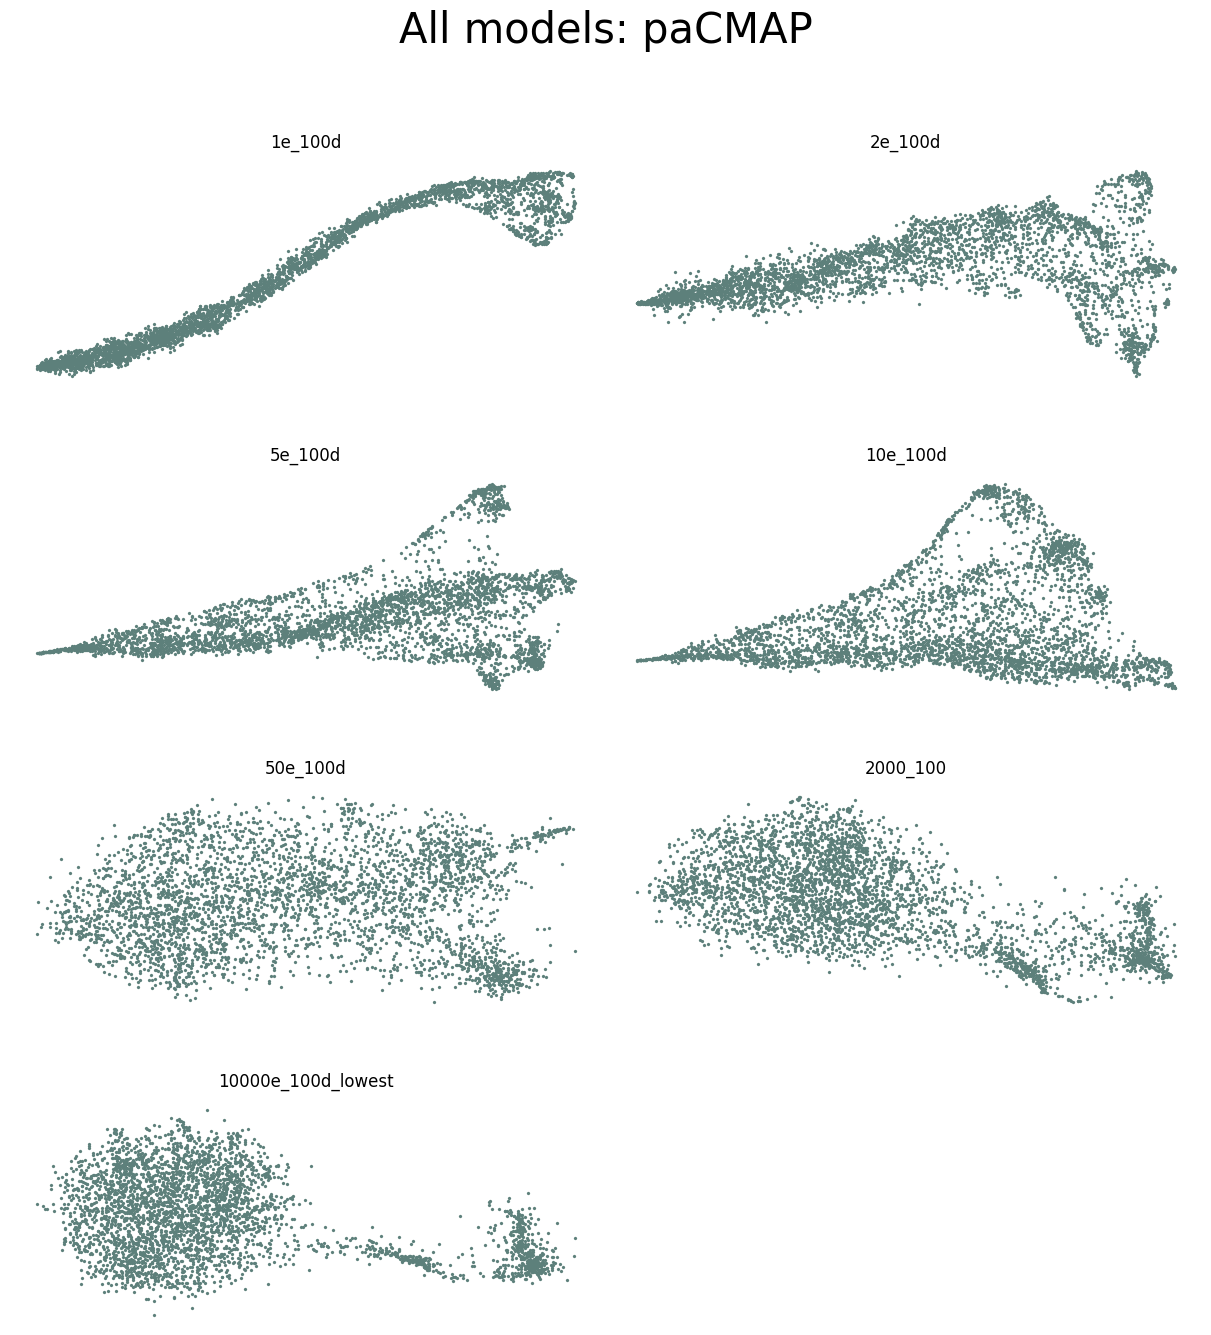

In [234]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_50_100, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
                [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
                lw=0.1, s=5, label=current_count_code, c='#5D807B'
            )
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


# PARAMS NEIGHBORS

In [235]:
X10 = model.wv.vectors
embedding_x10 = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_5 = embedding_x10.fit_transform(X10, init="pca")

X11 = model.wv.vectors
embedding_x11 = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_10 = embedding_x11.fit_transform(X11, init="pca")

X12 = model.wv.vectors
embedding_x12 = pacmap.PaCMAP(n_components=2, n_neighbors=15, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_15 = embedding_x12.fit_transform(X12, init="pca")

X13 = model.wv.vectors
embedding_x13 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_20 = embedding_x13.fit_transform(X13, init="pca")

X14 = model.wv.vectors
embedding_x14 = pacmap.PaCMAP(n_components=2, n_neighbors=30, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_30 = embedding_x14.fit_transform(X14, init="pca")

X15 = model.wv.vectors
embedding_x15 = pacmap.PaCMAP(n_components=2, n_neighbors=40, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_40 = embedding_x15.fit_transform(X15, init="pca")


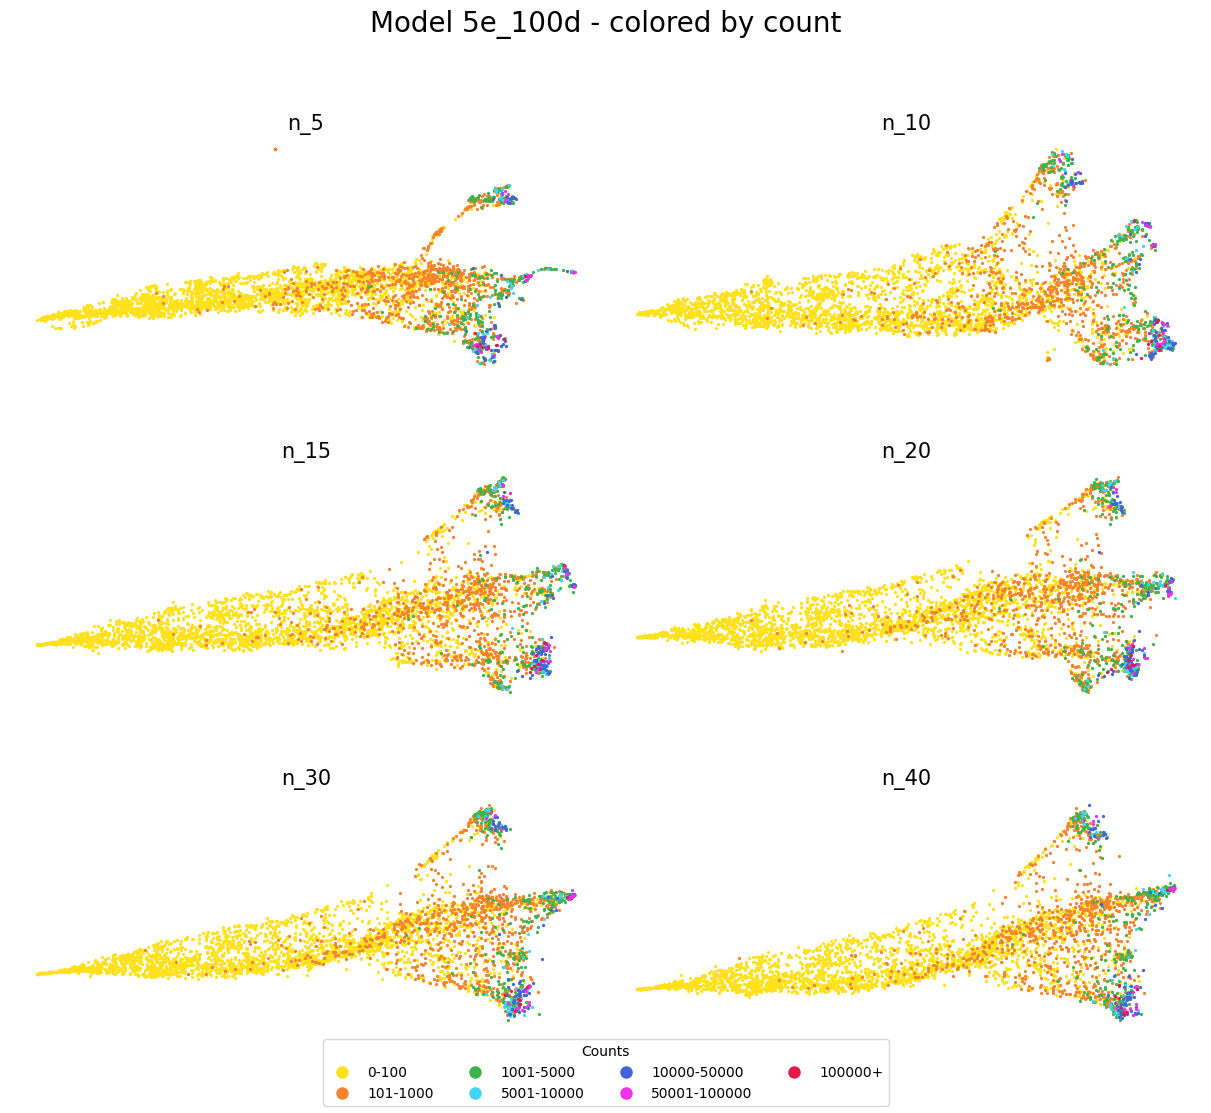

In [236]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(3, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_n_5, proj_n_10, proj_n_15, proj_n_20, proj_n_30, proj_n_40]  # Use xs to select different dimensionality reduction results
ts = ["n_5", "n_10", "n_15", "n_20", "n_30", "n_40"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )  
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


# WHAT ARE THE 3 CHICKENTOES?

In [237]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express
#fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True}, text=station_names)
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True})

# Customize the size and color of the points
fig.update_traces(marker=dict(size=5,  # Adjust the size of the points as needed
                               color='#5D807B',  # Change the color of the points
                               opacity=1.0),  # Adjust the opacity of the points
                  selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)

)




# Show the plot
fig.show()


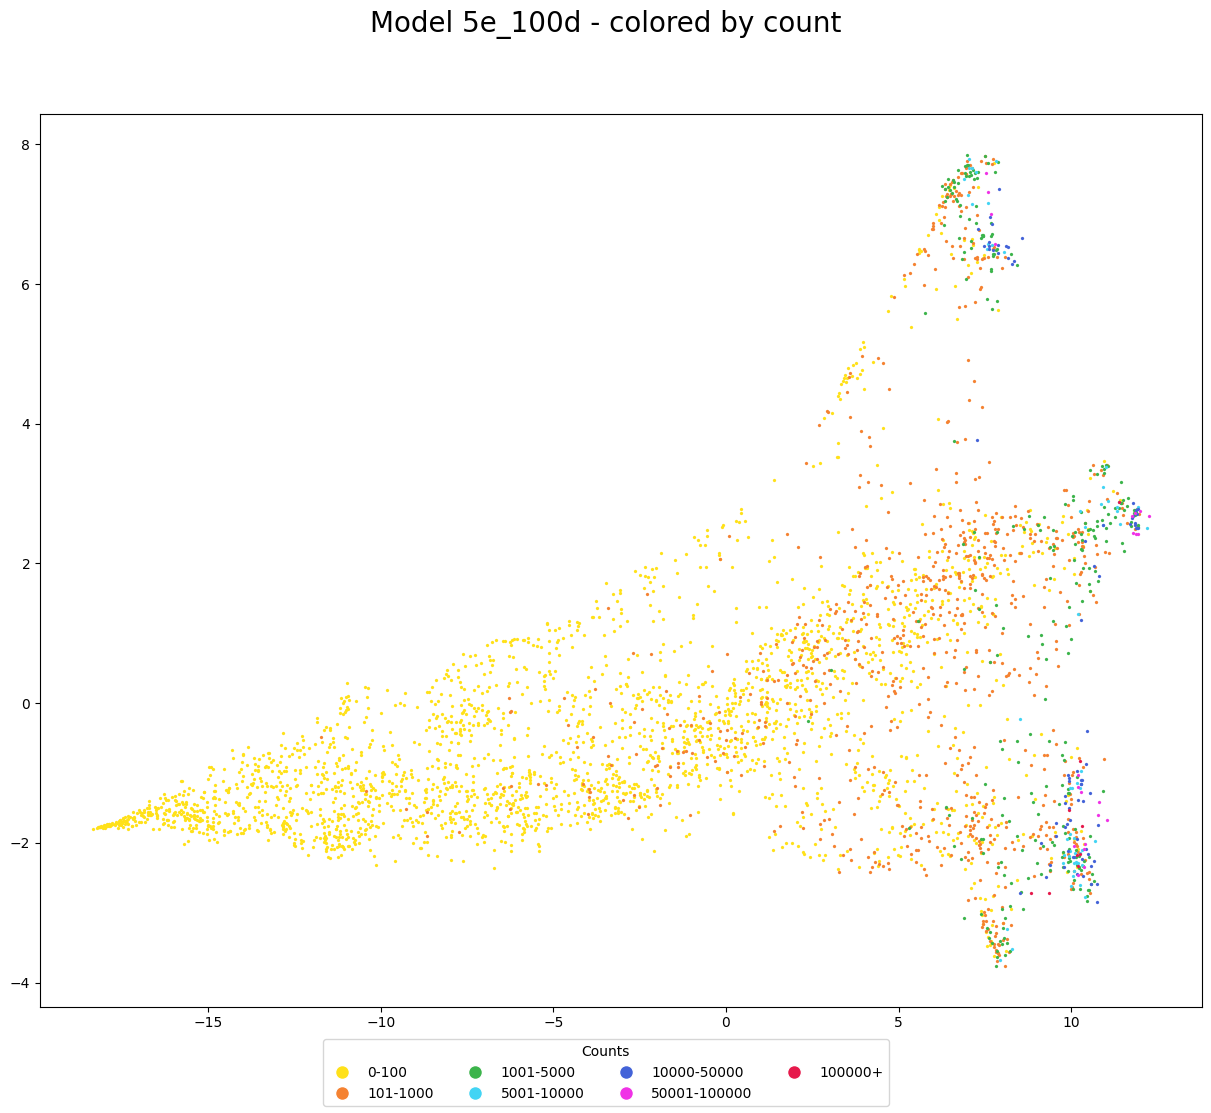

In [238]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


In [239]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express and color by count
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Station Name', 
                 hover_data={'Station Name': True},
                 color_discrete_map=count_colors)  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()


In [240]:
import plotly.express as px
import pandas as pd

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
print(unique_count_codes)
num_colors = len(unique_count_codes)
#color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
color_palette = ['gold', 'tomato', 'limegreen', 'deepskyblue', 'royalblue', 'orchid', 'crimson']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]  # Use modulo to cycle through the color palette

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Map addresses to counts
address_counts = {address: address_cluster_count[address] for address in journey_ids}
df['Count'] = df['Station Name'].map(address_counts)

# Map counts to colors
df['Color'] = df['Count'].map(count_colors)

# Create a scatter plot using Plotly Express and color by count
fig = px.scatter(df, x='Dimension 1', y='Dimension 2',
                 hover_data={'Station Name': True},
                 size_max=5, opacity=1.0)  # Customize the size of the points

# Assign colors directly to data points using marker_color
fig.update_traces(marker=dict(color=df['Color']), selector=dict(mode='markers'))
# Update the legend to show interactive behavior
fig.update_traces(showlegend=True)



# Update the layout
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800,  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()



[100, 1000, 5000, 10000, 50000, 100000, 100001]


In [241]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
print(unique_count_codes)
num_colors = len(unique_count_codes)
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#color_palette = ['gold', 'tomato', 'limegreen', 'deepskyblue', 'royalblue', 'orchid', 'crimson']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]  # Use modulo to cycle through the color palette

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Map addresses to counts
address_counts = {address: address_cluster_count[address] for address in journey_ids}
df['Count'] = df['Station Name'].map(address_counts)

# Map counts to colors
df['Color'] = df['Count'].map(count_colors)
# Create traces for each unique color

import plotly.graph_objects as go

# Create traces for each unique color
legend_traces = []
for count_code, color in count_colors.items():
    # Filter DataFrame to include only rows with the current count_code
    filtered_df = df[df['Count'] == count_code]
    # Create a scatter trace for this color
    trace = go.Scatter(
        x=filtered_df['Dimension 1'],
        y=filtered_df['Dimension 2'],
        mode='markers',
        marker=dict(color=color),
        name=str(count_code),  # Use count_code as legend label
        hoverinfo='text',  # Show text on hover
        text=filtered_df['Station Name'] + ' (' + filtered_df['Count'].astype(str) + ')',  # Concatenate station name and count
    )
    legend_traces.append(trace)

# Add the scatter traces to the figure
fig = go.Figure(data=legend_traces)

# Update the layout
fig.update_layout(
    title="PaCMAP Visualization",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()



[100, 1000, 5000, 10000, 50000, 100000, 100001]


In [242]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

#add colors to all stations based on there similiarity to kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)

# Create the scatter plot using Plotly Express and color by sim
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Sim', 
                 hover_data={'Station Name': True}, color_continuous_scale='YlOrRd')  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    height=800,  # Set the height of the plot (in pixels)
    coloraxis_colorbar=dict(
        title="Similarity",
        tickvals=[low_value, 0, high_value],  # Custom tick values
        ticktext=[math.trunc(low_value), high_value],  # Custom tick labels
    )
)


# Show the plot
fig.show()


In [243]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Count from map address_cluster_count that maps each address to the count intervals
df['Count'] = df['Station Name'].map(address_cluster_count)

# Sim to Kbh from map kbh_to_sim that maps address to its similarity to Kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)

#
df['Zip'] = df['Station Name'].map(modified_address_cluster_zips)
df


Dimension 1  Dimension 2                Station Name   Count       Sim  \
0        8.841460    -2.711983                 København H  100001  1.000000   
1        7.756836     7.731869                  Borrebyvej     100  0.319155   
2        9.993670    -2.624164              Hulgårds Plads   10000  0.333351   
3       10.382603    -2.087828  Islands Brygge St. (Metro)  100000  0.488555   
4       10.252951    -0.827065         København H (Metro)  100001  0.612470   
...           ...          ...                         ...     ...       ...   
3746   -14.066531    -1.780436               Sydstrandsvej     100  0.343112   
3747   -15.753881    -1.408742                  Pildamsvej     100  0.245796   
3748   -13.473424    -1.722292                   Poppelhøj     100  0.288901   
3749   -17.424181    -1.628979        CBS Handelshøjskolen     100  0.426355   
3750   -16.526999    -1.497309              Grønnegårdsvej     100  0.379231   

       Zip  
0     1000  
1     1000  
2     1000  
3     1000  
4     1000  
...    ...  
3746  2300  
3747  2600  
3748   NaN  
3749   NaN  
3750   NaN  

[3751 rows x 6 columns]

#### top toe

In [244]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 9.59) & 
                 (df['Dimension 2'] >= 4.7) & (df['Dimension 2'] <= 7.8)]
filtered_df

Dimension 1  Dimension 2                    Station Name  Count  \
1        7.756836     7.731869                      Borrebyvej    100   
5        7.625111     6.543994  Frederiksberg Allé St. (Metro)  50000   
8        8.340149     6.328045          Lufthavnen St. (Metro)  50000   
12       8.078550     6.394536                    Ryumgårdsvej   1000   
15       8.178125     6.526780                        Kapelvej  50000   
...           ...          ...                             ...    ...   
929      6.631157     5.965970               V.E. Gamborgs Vej    100   
954      6.160266     7.132909           Overgaden Oven Vandet   1000   
973      6.338201     7.097594                     Hermodsgade   1000   
977      6.008609     6.793616                     Uplandsgade   1000   
1027     6.680231     5.498901                        Kochsvej    100   

           Sim   Zip  
1     0.319155  1000  
5     0.436926   NaN  
8     0.337089  2300  
12    0.271551  2300  
15    0.323301  1000  
...        ...   ...  
929   0.340339  1000  
954   0.469200  1000  
973   0.466734  1000  
977   0.473413  2300  
1027  0.472338  2600  

[196 rows x 6 columns]

In [245]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                     Station Name   Count  \
124      7.529376     7.593037  Københavns Lufthavn St. (Metro)  100000   
128      7.667384     7.008112              Øresund St. (Metro)  100000   
113      7.805408     6.577986         Marmorkirken St. (Metro)  100000   
33       7.604814     7.320368                     Nordhavn St.  100000   
120      7.890085     6.566918                     Tivoli Hotel   50000   
...           ...          ...                              ...     ...   
706      7.095704     6.158131                     Kærskiftevej     100   
708      7.476078     6.421298                  Kløverbladsgade     100   
722      6.508404     6.436595                      Vingelodden     100   
741      6.094177     5.924737                   Guldbergs Have     100   
1027     6.680231     5.498901                         Kochsvej     100   

           Sim   Zip  
124   0.347411   NaN  
128   0.381213   NaN  
113   0.377311  1000  
33    0.507531  1000  
120   0.443382  1000  
...        ...   ...  
706   0.323643  2300  
708   0.435963  2300  
722   0.409175  1000  
741   0.381078  1000  
1027  0.472338  2600  

[196 rows x 6 columns]

In [246]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2      Station Name  Count       Sim   Zip
597     6.391434     7.247612  Banegårdspladsen   1000  0.714777  1000
425     6.945302     7.661025        Halmtorvet   1000  0.651689  1000
490     6.592350     7.459563    Reventlowsgade   5000  0.650409  1000
317     7.580669     6.569843   Vesterbros Torv  10000  0.581390  1000
420     6.749316     7.303827        Dybbølsbro   1000  0.571307  1000
..           ...          ...               ...    ...       ...   ...
714     7.353106     6.229465            Herlev   1000  0.160416  1000
240     7.285196     6.359184          Krimsvej   1000  0.152964  2300
831     6.285241     7.182217       Royal Arena   1000  0.140835  2300
779     6.356481     7.189934        Strandgade   5000  0.139912  1000
199     7.392525     6.657149     Dragør Rådhus   5000  0.099921  2300

[196 rows x 6 columns]

#### Middle toe

In [247]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 10.0) & (df['Dimension 1'] <= 12.31) & 
                 (df['Dimension 2'] >= 1.0) & (df['Dimension 2'] <= 2.19)]
filtered_df

Dimension 1  Dimension 2                    Station Name  Count  \
96     10.815503     1.818264             Kastrup St. (Metro)  50000   
208    10.560318     1.604491            Frederiksberg Rådhus   5000   
233    10.678809     1.956276              Prins Jørgens Gård   1000   
272    10.791102     1.742971              Universitetsparken   5000   
300    11.543079     2.185844                 Jyllingevej St.   5000   
306    10.525293     1.928338                        Søtorvet   5000   
312    10.506647     1.709644                Sønder Boulevard   5000   
324    10.372706     2.113578                       Arkaderne   1000   
328    10.622017     1.549150             Karen Blixens Plads   1000   
332    10.657305     1.963121             Otto Mønsteds Plads  50000   
358    10.293569     1.185710              Sundby St. (Metro)  50000   
364    10.695205     1.892570        H.C. Andersens Boulevard   5000   
372    10.318321     1.461791                         Digevej   5000   
377    10.545139     1.612861               A.H. Vedels Plads    100   
379    10.982000     2.157374                Sjælør Boulevard   1000   
384    10.716372     1.445237                   Kirkegårdsvej   1000   
388    11.082696     2.146544                   Krudttårnsvej   1000   
419    10.084721     2.045930                    Rovsingsgade   5000   
427    10.357039     1.930248                     Persiensvej   5000   
428    10.220698     1.686149                  Flintholm Allé   1000   
443    10.415078     2.010257               Ndr. Frihavnsgade   1000   
453    10.301006     2.187402                  Søndre Frihavn   5000   
458    10.759123     2.133441                      Melstedvej   1000   
461    10.187297     1.278879              Ørestads Boulevard  10000   
492    10.090163     2.075181                        Søvænget    100   
496    10.150207     1.716308  Det Biovidenskabelige Fakultet   5000   
500    10.260800     1.854724                     Wildersgade   1000   
554    10.296906     1.877759                  Landsdommervej   1000   
608    10.092715     1.853573                 Kirkebjerg Allé    100   
665    10.216665     1.272891                       Foldbyvej   1000   

          Sim   Zip  
96   0.260251  2300  
208  0.264114   NaN  
233  0.541697  1000  
272  0.387789  1000  
300  0.332017  1000  
306  0.411133  1000  
312  0.362342  1000  
324  0.353788  1000  
328  0.366392  2300  
332  0.423142  1000  
358  0.393300   NaN  
364  0.531791  1000  
372  0.313637  2800  
377  0.359595  1000  
379  0.189830  1000  
384  0.435711  2300  
388  0.375865  2300  
419  0.376597  1000  
427  0.329622  2300  
428  0.315060  1000  
443  0.481276  1000  
453  0.348808   NaN  
458  0.219132  2300  
461  0.416642  2300  
492  0.390049   NaN  
496  0.363306   NaN  
500  0.375795  1000  
554  0.479394  1000  
608  0.483895  2600  
665  0.262109  2300

In [248]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                    Station Name  Count  \
96     10.815503     1.818264             Kastrup St. (Metro)  50000   
358    10.293569     1.185710              Sundby St. (Metro)  50000   
332    10.657305     1.963121             Otto Mønsteds Plads  50000   
461    10.187297     1.278879              Ørestads Boulevard  10000   
272    10.791102     1.742971              Universitetsparken   5000   
300    11.543079     2.185844                 Jyllingevej St.   5000   
306    10.525293     1.928338                        Søtorvet   5000   
312    10.506647     1.709644                Sønder Boulevard   5000   
496    10.150207     1.716308  Det Biovidenskabelige Fakultet   5000   
364    10.695205     1.892570        H.C. Andersens Boulevard   5000   
372    10.318321     1.461791                         Digevej   5000   
208    10.560318     1.604491            Frederiksberg Rådhus   5000   
453    10.301006     2.187402                  Søndre Frihavn   5000   
419    10.084721     2.045930                    Rovsingsgade   5000   
427    10.357039     1.930248                     Persiensvej   5000   
500    10.260800     1.854724                     Wildersgade   1000   
443    10.415078     2.010257               Ndr. Frihavnsgade   1000   
554    10.296906     1.877759                  Landsdommervej   1000   
458    10.759123     2.133441                      Melstedvej   1000   
384    10.716372     1.445237                   Kirkegårdsvej   1000   
428    10.220698     1.686149                  Flintholm Allé   1000   
388    11.082696     2.146544                   Krudttårnsvej   1000   
379    10.982000     2.157374                Sjælør Boulevard   1000   
328    10.622017     1.549150             Karen Blixens Plads   1000   
324    10.372706     2.113578                       Arkaderne   1000   
233    10.678809     1.956276              Prins Jørgens Gård   1000   
665    10.216665     1.272891                       Foldbyvej   1000   
377    10.545139     1.612861               A.H. Vedels Plads    100   
492    10.090163     2.075181                        Søvænget    100   
608    10.092715     1.853573                 Kirkebjerg Allé    100   

          Sim   Zip  
96   0.260251  2300  
358  0.393300   NaN  
332  0.423142  1000  
461  0.416642  2300  
272  0.387789  1000  
300  0.332017  1000  
306  0.411133  1000  
312  0.362342  1000  
496  0.363306   NaN  
364  0.531791  1000  
372  0.313637  2800  
208  0.264114   NaN  
453  0.348808   NaN  
419  0.376597  1000  
427  0.329622  2300  
500  0.375795  1000  
443  0.481276  1000  
554  0.479394  1000  
458  0.219132  2300  
384  0.435711  2300  
428  0.315060  1000  
388  0.375865  2300  
379  0.189830  1000  
328  0.366392  2300  
324  0.353788  1000  
233  0.541697  1000  
665  0.262109  2300  
377  0.359595  1000  
492  0.390049   NaN  
608  0.483895  2600

In [249]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2                    Station Name  Count  \
233    10.678809     1.956276              Prins Jørgens Gård   1000   
364    10.695205     1.892570        H.C. Andersens Boulevard   5000   
608    10.092715     1.853573                 Kirkebjerg Allé    100   
443    10.415078     2.010257               Ndr. Frihavnsgade   1000   
554    10.296906     1.877759                  Landsdommervej   1000   
384    10.716372     1.445237                   Kirkegårdsvej   1000   
332    10.657305     1.963121             Otto Mønsteds Plads  50000   
461    10.187297     1.278879              Ørestads Boulevard  10000   
306    10.525293     1.928338                        Søtorvet   5000   
358    10.293569     1.185710              Sundby St. (Metro)  50000   
492    10.090163     2.075181                        Søvænget    100   
272    10.791102     1.742971              Universitetsparken   5000   
419    10.084721     2.045930                    Rovsingsgade   5000   
388    11.082696     2.146544                   Krudttårnsvej   1000   
500    10.260800     1.854724                     Wildersgade   1000   
328    10.622017     1.549150             Karen Blixens Plads   1000   
496    10.150207     1.716308  Det Biovidenskabelige Fakultet   5000   
312    10.506647     1.709644                Sønder Boulevard   5000   
377    10.545139     1.612861               A.H. Vedels Plads    100   
324    10.372706     2.113578                       Arkaderne   1000   
453    10.301006     2.187402                  Søndre Frihavn   5000   
300    11.543079     2.185844                 Jyllingevej St.   5000   
427    10.357039     1.930248                     Persiensvej   5000   
428    10.220698     1.686149                  Flintholm Allé   1000   
372    10.318321     1.461791                         Digevej   5000   
208    10.560318     1.604491            Frederiksberg Rådhus   5000   
665    10.216665     1.272891                       Foldbyvej   1000   
96     10.815503     1.818264             Kastrup St. (Metro)  50000   
458    10.759123     2.133441                      Melstedvej   1000   
379    10.982000     2.157374                Sjælør Boulevard   1000   

          Sim   Zip  
233  0.541697  1000  
364  0.531791  1000  
608  0.483895  2600  
443  0.481276  1000  
554  0.479394  1000  
384  0.435711  2300  
332  0.423142  1000  
461  0.416642  2300  
306  0.411133  1000  
358  0.393300   NaN  
492  0.390049   NaN  
272  0.387789  1000  
419  0.376597  1000  
388  0.375865  2300  
500  0.375795  1000  
328  0.366392  2300  
496  0.363306   NaN  
312  0.362342  1000  
377  0.359595  1000  
324  0.353788  1000  
453  0.348808   NaN  
300  0.332017  1000  
427  0.329622  2300  
428  0.315060  1000  
372  0.313637  2800  
208  0.264114   NaN  
665  0.262109  2300  
96   0.260251  2300  
458  0.219132  2300  
379  0.189830  1000

#### Bottom Toe

In [250]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 10.85) & 
                 (df['Dimension 2'] >= -4.53) & (df['Dimension 2'] <= -1.558)]
filtered_df

Dimension 1  Dimension 2                       Station Name   Count  \
0        8.841460    -2.711983                        København H  100001   
2        9.993670    -2.624164                     Hulgårds Plads   10000   
3       10.382603    -2.087828         Islands Brygge St. (Metro)  100000   
6       10.206202    -2.330997                      Nørreport St.  100001   
9       10.777809    -1.751386     Aksel Møllers Have St. (Metro)   50000   
...           ...          ...                                ...     ...   
1275     6.281996    -1.851720                          Valhøjvej     100   
1287     7.708246    -2.019491                         Krumtappen     100   
1390     6.706867    -1.931334                       Grønjordsvej     100   
1436     6.303623    -2.078332  CitizenM Copenhagen Radhuspladsen    1000   
1564     7.175503    -1.960101                          Skibbroen     100   

           Sim   Zip  
0     1.000000  1000  
2     0.333351  1000  
3     0.488555  1000  
6     0.491959  1000  
9     0.375848   NaN  
...        ...   ...  
1275  0.352379  2300  
1287  0.405014  2300  
1390  0.346353  2300  
1436  0.485806   NaN  
1564  0.446363  1000  

[323 rows x 6 columns]

In [251]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                Station Name   Count       Sim  \
0        8.841460    -2.711983                 København H  100001  1.000000   
10       9.358731    -2.715449                CPH Lufthavn  100001  0.221914   
61      10.169251    -2.181003  Christianshavn St. (Metro)  100001  0.438842   
19      10.249097    -2.159214                 Refshaleøen  100001  0.372995   
143     10.322454    -1.754196                 Ørestad St.  100001  0.277555   
...           ...          ...                         ...     ...       ...   
766      7.673495    -2.959644              Kildevældsgade     100  0.428671   
556      7.760921    -3.615263  Den danske Scenekunstskole     100  0.260879   
753      7.412465    -3.027347                  Ebertsgade     100  0.323265   
751      6.949398    -1.745380                 Ringholmvej     100  0.382714   
1564     7.175503    -1.960101                   Skibbroen     100  0.446363   

       Zip  
0     1000  
10    2300  
61    1000  
19     NaN  
143   2300  
...    ...  
766   1000  
556    NaN  
753   2300  
751   1000  
1564  1000  

[323 rows x 6 columns]

In [252]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2     Station Name   Count       Sim   Zip
0       8.841460    -2.711983      København H  100001  1.000000  1000
797     7.448530    -1.952017     Tietgensgade    5000  0.713983  1000
111    10.249062    -2.149396  Bernstorffsgade   10000  0.693911  1000
273    10.538764    -1.898929      Trommesalen    5000  0.644883  1000
650     9.276830    -1.885653       Gammeltorv    1000  0.610200  1000
..           ...          ...              ...     ...       ...   ...
536     9.903780    -2.269370        Skøjtevej    5000  0.175520  2300
551     8.095076    -2.634971         Glostrup    1000  0.169490  2600
438     8.219232    -3.543263     Artillerivej    5000  0.150299  2300
505     9.007426    -2.286347  Sundbyvestervej    5000  0.146351  2300
550     7.903331    -3.601418          Rødovre    1000  0.125237  2600

[323 rows x 6 columns]

In [253]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'København H' in seq:
        for place in seq: 
            if place != 'København H':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 52947),
 ('Refshaleøen', 27077),
 ('Kongens Nytorv St. (Metro)', 21958),
 ('Ørestad St.', 18593),
 ('Nørreport St.', 15321),
 ('Marmorkirken St. (Metro)', 11293),
 ('Trianglen St. (Metro)', 9643),
 ('Nordhavn St.', 8447),
 ('Østerport St.', 8266),
 ('Nørrebro St.', 7211),
 ('Gammel Strand St. (Metro)', 6526),
 ('Valby St.', 6486),
 ('Amagerbro St. (Metro)', 5639),
 ('Alliancevej', 5485),
 ('Orientkaj St. (Metro)', 5413),
 ('Christianshavn St. (Metro)', 5393),
 ('Sydhavn St.', 5228),
 ('Carlsberg St.', 5092),
 ('Elmegade', 4803),
 ('Frederiksberg St. (Metro)', 4623),
 ('Bella Center St. (Metro)', 4457),
 ('Zoologisk Have', 4356),
 ('Sundbyvester Plads', 4303),
 ('Ørestad St. (Metro)', 4269),
 ('Tårnby St.', 4120),
 ('Hellerup St.', 4087),
 ('Bodenhoffs Plads', 4031),
 ('Vestamager St. (Metro)', 3971),
 ('Frederiks Brygge', 3897),
 ('Tivoli Hotel', 3883),
 ('Dybbølsbro St.', 3840),
 ('Nordhavn St. (Metro)', 3817),
 ('Lergravsparken St. (Metro)', 3760),
 ('Tycho Brahes A

In [254]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Amagerbro St. (Metro)' in seq:
        for place in seq: 
            if place != 'Amagerbro St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('Kongens Nytorv St. (Metro)', 9657),
 ('Nørreport St.', 9362),
 ('København H', 5639),
 ('CPH Lufthavn', 3973),
 ('Nørreport St. (Metro)', 2636),
 ('Forum St. (Metro)', 2567),
 ('Københavns Lufthavn St. (Metro)', 2212),
 ('Frederiksberg St. (Metro)', 2082),
 ('Ørestad St.', 2062),
 ('Trianglen St. (Metro)', 2018),
 ('Femøren St. (Metro)', 1705),
 ('Christianshavn St. (Metro)', 1677),
 ('Nørrebro St.', 1635),
 ('Øresund St. (Metro)', 1592),
 ('Ørestad St. (Metro)', 1521),
 ('Lufthavnen St. (Metro)', 1446),
 ('Vestamager St. (Metro)', 1385),
 ('Sundbyvester Plads', 1331),
 ('Enghave Plads St. (Metro)', 1291),
 ('Bella Center St. (Metro)', 1209),
 ('Amager Strand St. (Metro)', 1014),
 ('København H (Metro)', 993),
 ('Kastrup St. (Metro)', 963),
 ('Rådhuspladsen', 951),
 ('Vanløse St.', 942),
 ('Rådhuspladsen St. (Metro)', 928),
 ('Østerport St.', 842),
 ('Fasanvej St. (Metro)', 830),
 ('Rådhuspladsen St.', 736),
 ('Nordhavn St.', 735),
 ('Kongens Nytorv', 729),
 ('Skjolds Plads St. (Met

In [255]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Øresund St. (Metro)' in seq:
        for place in seq: 
            if place != 'Øresund St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 9692),
 ('Københavns Lufthavn St. (Metro)', 6516),
 ('Lufthavnen St. (Metro)', 6169),
 ('Kongens Nytorv St. (Metro)', 6125),
 ('Nørreport St.', 4412),
 ('Kastrup St. (Metro)', 3370),
 ('København H', 1953),
 ('Christianshavn St. (Metro)', 1747),
 ('Amagerbro St. (Metro)', 1592),
 ('Nørreport St. (Metro)', 1331),
 ('Forum St. (Metro)', 1087),
 ('Lergravsparken St. (Metro)', 967),
 ('Frederiksberg St. (Metro)', 851),
 ('København H (Metro)', 776),
 ('Femøren St. (Metro)', 762),
 ('Københavns Lufthavn', 723),
 ('Rådhuspladsen', 721),
 ('Ørestad St.', 696),
 ('Rådhuspladsen St. (Metro)', 629),
 ('Trianglen St. (Metro)', 585),
 ('Marmorkirken St. (Metro)', 572),
 ('Kongens Nytorv', 470),
 ('Ørestad St. (Metro)', 467),
 ('Islands Brygge St. (Metro)', 451),
 ('Christianshavn St.', 443),
 ('Enghave Plads St. (Metro)', 426),
 ('Vestamager St. (Metro)', 396),
 ('Kongens Nytorv St.', 394),
 ('Nordhavn St.', 378),
 ('Nørrebro St.', 376),
 ('Gammel Strand St. (Metro)', 354),
 ('Be

## FINDINGS

- 8/9 of stations with count 100000+ are in bottom toe
- 1 is left (Amagerbro St. (Metro)) in the middle toe
- Those between 50000 and 100000 are split into all 3 toes